# Micro extraction mechanism model

## Example

In this example notebook, we will reproduce 
 - ....

In [1]:
#First import numpy, since all arrays are based on numpy
import numpy as np 

#Import matplotlib, for plotting
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Import the main model library
import mextractmodel as mex

All parameters must be adopted in the same units of space/time/mass/volume
here we adopt:
- space units: "cm" 
- time units: "seconds" (s)
- mass: micro-grams (mug)
- volume: cm^3 (mL)


In [12]:
#Experiment basename
name = "gdme"

Now we need to set the domain, that is, the position of the interfaces.

In [3]:
#Domain definition (position of interfaces) 
# x0   x1   x2
# |----|----|
#x=np.array([initial_position, interface_1, interface_2, final_position])
#x=np.array([0, 1]) # cm
#x=np.array([0, 0.5, 1]) # cm
x=np.array([0, 1, 5, 5.1])

Now we set the names of the compartments, for ploting purposes

In [11]:
#Names of compartments
#xnames = ["", "", ""]
xnames = ["coating", "headspace", "aqueous"]

Set initial concentrations, constant in each compartment.

In [5]:
#Initial concentrations in each space
#  Assumed constant for each space
#   C0   C1   C2
# |----|----|----|
#C=np.array([0.0, 1.0]) #mug/mL
C=np.array([0.01, 0.0, 0.0]) #mug/mL 


Diffusion coefficients for each compartment, constant at each one.

In [7]:
#Diffusion coefficients for each space
#   D0   D1   D2
# |----|----|----|
#D=np.array([2.0, 1.0]) # 2 spaces (cm^2/s)
D=np.array([219e-6, 0.11, 219e-6]) # (cm^2/s)

Set the partition coefficients. Always enforce zero at external boundaries for no flow condition.

In [8]:
#Partition coefficients K for each interface
# Set 0.0 for beggining and endpoints    
# K0  K1  K2   K3
# |---|---|----|
#K=np.array([0.0, 2.0, 0.0]) # 2 boundaries and 1 interface coefficient, non-dimensional
K=np.array([0.0, 13, 0.08, 0.0]) # 

Now configure runtime options

In [9]:
#Max time definition 
#maxtime = 10*60 #10 minutes
maxtime = 6000 #seconds

#Time step size
dt = 0.1  #Seconds 

#Plotting time spots
iplot_time=np.array([0.0, 300.0, 600.0, 1500.0, 3000.0, 6000])
#iplot_time=np.linspace(0, 50, 21, endpoint=True)

#Space discretization (number of grid points)
N = 500

We now build the device with these parameters (we have given the same names of the variables as the device function arguments, but we could have called the variables differently)

In [13]:
p = mex.device(D = D, K = K, C = C, xspace = x, 
        xnames = xnames, name = name, 
        N = N, dt = dt, maxtime = maxtime, iplot_time = iplot_time)


        --------------------------------------------------------------
        Micro Extraction Diffusion Model
        Pedro S. Peixoto - University of Sao Paulo (ppeixoto@usp.br)
        --------------------------------------------------------------
        
You defined a mechanism with 3 compartment(s).
Mechanism layout/interfaces (x):  [0.  1.  5.  5.1]
Initial concentrations: [0.01 0.   0.  ]
Diffusion coefficients: [0.000219 0.11     0.000219]
Interface coefficients: [ 0.   13.    0.08  0.  ]
Output basename: output/gdme/gdme

Compartment 0  setup
 Name:                   coating
 Local Domain:           [0. 1.]
 Difusion (neigbours):   [0.       0.000219 0.11    ]
 Border/Interfaces Coef: [ 0. 13.]

Compartment 1  setup
 Name:                   headspace
 Local Domain:           [1. 5.]
 Difusion (neigbours):   [0.000219 0.11     0.000219]
 Border/Interfaces Coef: [13.    0.08]

Compartment 2  setup
 Name:                   aqueous
 Local Domain:           [5.  5.1]
 Difusion (



Now that the device structure is built, we can actually use in a few ways. 

Lets loop in time the model to see how the concentrations evolve in time. The main function here is run(), which calculates all time steps of an implicit solver for the model of the device. It will save and return snapshots at all time set in iplot_time.

In [14]:
concentrations = p.run()

 It:  0  Time:  0.0  Mass:  0.0100  %Dif Eq:  100.0000 %
 It:  3000  Time:  300.0  Mass:  0.0101  %Dif Eq:  46.4133 %
 It:  6000  Time:  600.0  Mass:  0.0101  %Dif Eq:  31.6164 %
 It:  15000  Time:  1500.0  Mass:  0.0101  %Dif Eq:  11.2389 %
 It:  30000  Time:  3000.0  Mass:  0.0101  %Dif Eq:  1.8198 %
 It:  60000  Time:  6000.0  Mass:  0.0101  %Dif Eq:  0.0583 %
 
 Saving concentrations as 
  output/gdme/gdme_data.csv

 %Eq   Time 
50.0 %   262.00
60.0 %   384.00
70.0 %   652.70
80.0 %   1017.00
90.0 %   1596.70
95.0 %   2169.10
99.0 %   3488.50
99.5 %   4047.40



The snapshots were saved in the csv files and also returned to the list of snapshots given at "concentrations". We can use this output to plot the concentrations, as follows. 

The model also calculates the theoretical equilibrium state, which may be accessed via p.u_equi_ext. We can plot them all together.

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


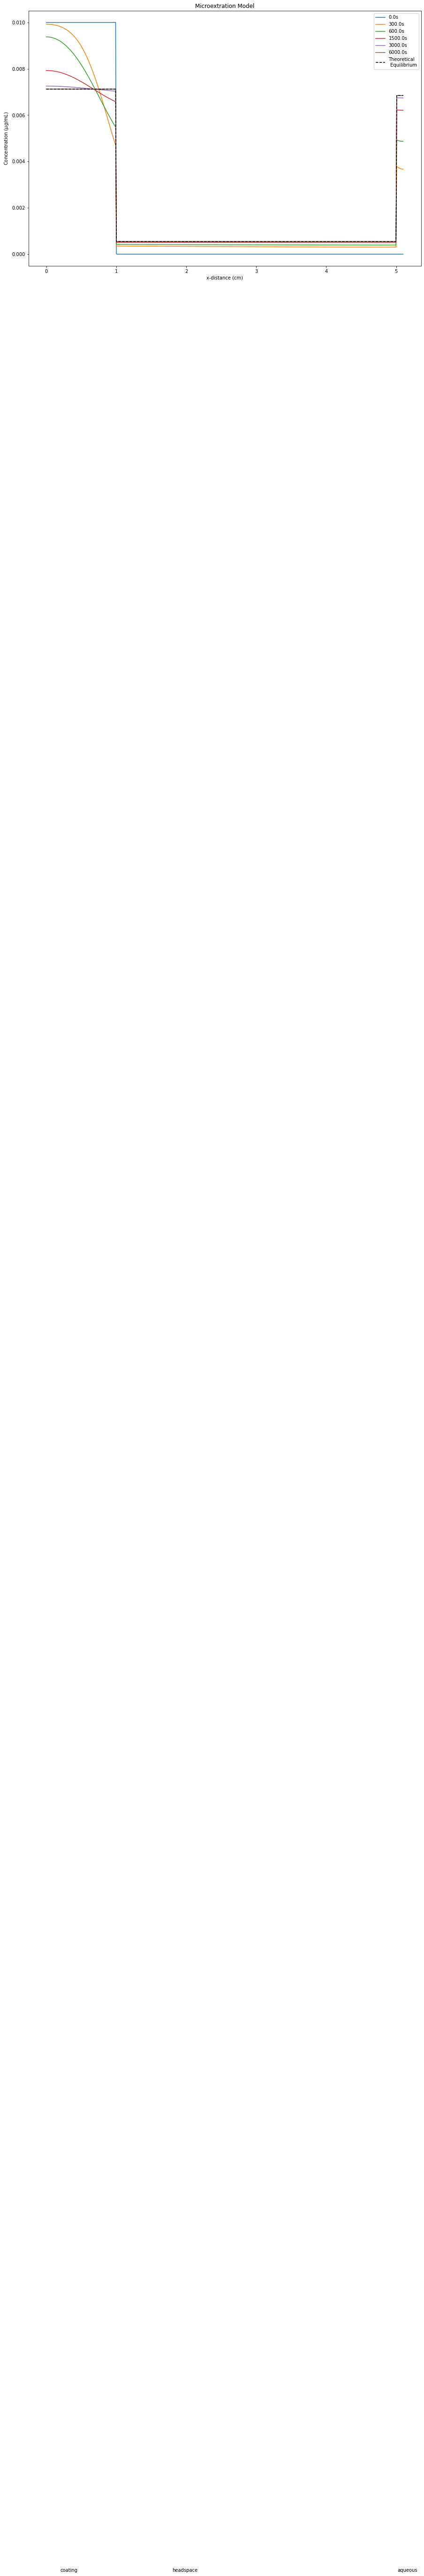

In [12]:
fig, axes = plt.subplots(1, 1, constrained_layout=True, figsize=(15,10))
plt.xlabel("x-distance (cm)")
plt.ylabel("Concentration ($\mu g/mL$)")
plt.title("Microextration Model")

for i, c in enumerate(concentrations):    
    #Plot
    t = iplot_time[i]
    axes.plot(p.x, c, label=str(t)+"s")
    
for i, name in enumerate(xnames):
    x=0.8*p.xspace[i]+0.2*p.xspace[i+1]
    plt.text(x, -0.1, name)
    
axes.plot(p.x, p.u_equi_ext, 'k--', label="Theoretical \n Equilibrium")
axes.legend()
plt.savefig(p.basename+"_final.png")

We can play around with fancier plots, that look more like the device it self

In [13]:
fig, axes = plt.subplots(1, 1, constrained_layout=True, figsize=(15,10))
plt.ylabel("Distance (cm)")
plt.xlabel("Concentration ($\mu g/mL$)")
plt.title("Microextration Model")

for i, c in enumerate(concentrations):    
    #Plot
    t = iplot_time[i]
    axes.plot(np.flip(c, 0), p.x, label=str(t)+"s")
    
for i, name in enumerate(reversed(xnames)):
    x=0.1*p.xspace[i]+0.9*p.xspace[i+1]
    plt.text(1.5, x, name)
    
axes.plot(np.flip(p.u_equi_ext, 0), p.x, 'k--', label="Theoretical \n Equilibrium")
axes.legend()
plt.savefig(p.basename+"_final_vertical.png")

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 114270x608 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1080x720 with 1 Axes>